In [ ]:
## MAachine Learning Series from Sent dex

In [ ]:
#Regression Analysus
'''
Supervised ML each attribute together makes the dataset as opposed to classification
y=mx+c is the equation
Data here has various features and attributes
'''
from matplotlib import pyplot as plt
import seaborn as sns
import matplotlib.style as style
import pandas as pd
from sklearn import preprocessing,model_selection, svm
from sklearn.linear_model import LinearRegression
import yfinance as yf

In [ ]:


df=yf.download(["AAPL"],start="2010-01-01",end="2020-01-01")
df


[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2009-12-31,7.611786,7.619643,7.520000,7.526071,6.471691,352410800
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.572422,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.583784,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.479061,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.467082,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.510078,447610800
2010-01-11,7.600000,7.607143,7.444643,7.503929,6.452650,462229600
2010-01-12,7.471071,7.491786,7.372143,7.418571,6.379251,594459600
2010-01-13,7.423929,7.533214,7.289286,7.523214,6.469232,605892000


In [ ]:
df.shape

(2517, 6)

In [ ]:
df['HL_pct']=((df['High']-df['Adj Close'])/df['Adj Close'])*100

In [ ]:
df['pct_change']=((df['Adj Close']-df['Open'])/df['Open'])*100

In [ ]:
df=df[['Adj Close','HL_pct','pct_change']]

In [ ]:
df.head()

,Adj Close,HL_pct,pct_change
Date,,,
2009-12-31,6.471691,17.738063,-14.978026
2010-01-04,6.572422,16.558464,-13.776030
2010-01-05,6.583784,16.948597,-14.097882
2010-01-06,6.479061,18.640442,-15.377511
2010-01-07,6.467082,17.076430,-14.484866


In [ ]:
import math
forecast_col='Adj Close'
forecast_out=int(math.ceil(0.01*len(df)))
df.fillna(-9999,inplace=True)
df['label']= df[forecast_col].shift(-forecast_out)

C:\Anaconda_new\lib\site-packages\pandas\core\frame.py:4034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)
C:\Anaconda_new\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [ ]:
df.iloc[:27]


,Adj Close,HL_pct,pct_change,label
Date,,,,
2009-12-31,6.471691,17.738063,-14.978026,6.025155
2010-01-04,6.572422,16.558464,-13.776030,5.992293
2010-01-05,6.583784,16.948597,-14.097882,6.101318
2010-01-06,6.479061,18.640442,-15.377511,6.153835
2010-01-07,6.467082,17.076430,-14.484866,6.246581
2010-01-08,6.510078,16.303197,-13.322783,6.220476
2010-01-11,6.452650,17.891763,-15.096709,6.232145
2010-01-12,6.379251,17.439891,-14.613960,6.193450
2010-01-13,6.469232,16.446805,-12.859728,6.155061


In [ ]:
import numpy as np
df.dropna(inplace=True)
x=np.array(df.drop(['label'],1))
y=np.array(df['label'])


C:\Anaconda_new\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [ ]:
x=preprocessing.scale(x)
y=np.array(df['label'])

In [ ]:
x_train,x_test,y_train,y_test=model_selection.train_test_split(x,y,test_size=0.2)

In [ ]:
len(x_train),len(x_test),len(y_train),len(y_test)

(1992, 499, 1992, 499)

In [ ]:
clf=LinearRegression()

In [ ]:

clf.fit(x_train,y_train)
accuracy=clf.score(x_test,y_test)
accuracy

0.9645613486885458

In [ ]:
clf=svm.SVR(kernel='poly')# Using support vector machine
clf.fit(x_train,y_train)
accuracy=clf.score(x_test,y_test)
accuracy

C:\Anaconda_new\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.8149252350153573

In [ ]:
clf=LinearRegression(n_jobs=10)


clf.fit(x_train,y_train)
accuracy=clf.score(x_test,y_test)
accuracy

0.9645613486885458

In [ ]:
## Predicting data


df=yf.download(["AAPL"],start="2010-01-01",end="2020-01-01")
df.shape

df['HL_pct']=((df['High']-df['Adj Close'])/df['Adj Close'])*100

df['pct_change']=((df['Adj Close']-df['Open'])/df['Open'])*100

df=df[['Adj Close','HL_pct','pct_change']]

df.head()



forecast_col='Adj Close'
forecast_out=int(math.ceil(0.01*len(df)))
df.fillna(-9999,inplace=True)
df['label']= df[forecast_col].shift(-forecast_out)


x=np.array(df.drop(['label'],1))
x=preprocessing.scale(x)
x=x[:-forecast_out]
x_latetly=x[-forecast_out:]
df.dropna(inplace=True)
y=np.array(df['label'])
clf=LinearRegression()
clf.fit(x_train,y_train)
accuracy=clf.score(x_test,y_test)
accuracy

[*********************100%***********************]  1 of 1 completed


C:\Anaconda_new\lib\site-packages\pandas\core\frame.py:4034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)
C:\Anaconda_new\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Anaconda_new\lib\site-packages\ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


0.9645613486885458

In [ ]:
predicted_values=clf.predict(x_latetly)
predicted_values

array([57.03158242, 57.28271655, 58.26647342, 57.97124208, 58.87392838,
       58.86072528, 59.65701297, 60.18829769, 58.37877868, 58.72527848,
       60.10764857, 61.76466365, 62.06041177, 61.92946935, 62.01174572,
       62.69601351, 62.90434513, 63.39593142, 63.26925903, 63.8985671 ,
       63.3161487 , 64.19450064, 64.4685921 , 64.16903831, 63.38600806,
       63.18360113])

In [ ]:
df1=yf.download(["AAPL"],start="2010-01-01",end="2020-01-01")
df1['HL_pct']=((df1['High']-df1['Adj Close'])/df1['Adj Close'])*100

df1['pct_change']=((df1['Adj Close']-df1['Open'])/df1['Open'])*100

df1=df1[['Adj Close','HL_pct','pct_change']]

[*********************100%***********************]  1 of 1 completed


In [ ]:
import  datetime
df['Forecast'] = np.nan
last_date = df.iloc[-1].name
last_unix = last_date.timestamp()
one_day = 86400
next_unix = last_unix + one_day
for i in predicted_values:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += 86400
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)]+[i]

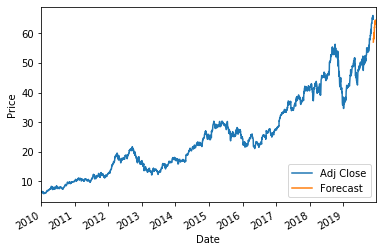

In [ ]:

df['Adj Close'].plot()
df['Forecast'].plot()

plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [ ]:
#Pickling and Saving Data
import pickle

In [ ]:
df=yf.download(["AAPL"],start="2010-01-01",end="2020-01-01")
df.shape

df['HL_pct']=((df['High']-df['Adj Close'])/df['Adj Close'])*100

df['pct_change']=((df['Adj Close']-df['Open'])/df['Open'])*100

df=df[['Adj Close','HL_pct','pct_change']]

df.head()



forecast_col='Adj Close'
forecast_out=int(math.ceil(0.01*len(df)))
df.fillna(-9999,inplace=True)
df['label']= df[forecast_col].shift(-forecast_out)


x=np.array(df.drop(['label'],1))
x=preprocessing.scale(x)
x=x[:-forecast_out]
x_latetly=x[-forecast_out:]
df.dropna(inplace=True)
y=np.array(df['label'])
#clf=LinearRegression()
#clf.fit(x_train,y_train)


#with open('l-regression.pickle','wb') as f:
    #pickle.dump(clf,f)

trained_and_saved=open('l-regression.pickle','rb')##Saving trained data and only testing data while running
clf=pickle.load(trained_and_saved)
    


accuracy=clf.score(x_test,y_test)
accuracy

[*********************100%***********************]  1 of 1 completed


C:\Anaconda_new\lib\site-packages\pandas\core\frame.py:4034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)
C:\Anaconda_new\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Anaconda_new\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


0.9645708863857094

In [ ]:
##Coding regression algorith by ourselves

In [ ]:
from statistics import mean

In [ ]:
ys = np.array(predicted_values)
xs = np.array(df1['Adj Close'][-26:])
#xs = np.array([1,2,3,4,5], dtype=np.float64)
#ys = np.array([6,3,2,5,1], dtype=np.float64)

In [ ]:
def find_slope_yins(xs,ys):
    m = (((mean(xs)*mean(ys)) - mean(xs*ys)) /
    ((mean(xs)*mean(xs)) - mean(xs*xs)))

    b = mean(ys) - m*mean(xs)

    return m.round(2), b.round(2)


In [ ]:
m,b=find_slope_yins(xs,ys)
m,b

(0.82, 5.97)

In [ ]:
regression_line=[m*x+b for x in xs]

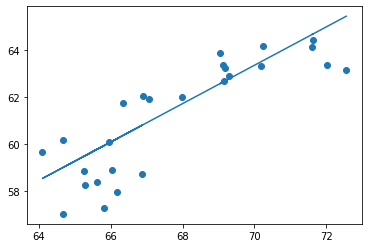

In [ ]:
plt.scatter(xs,ys)
plt.plot(xs,regression_line)
plt.show()

In [ ]:
continued_adj_close=np.array([73.738,71.738,68.242,75.373])
predict_manual=( m*continued_adj_close)+b

In [ ]:
predict_manual

array([66.43516, 64.79516, 61.92844, 67.77586])

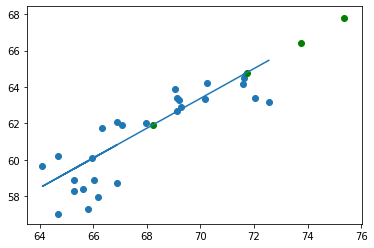

In [ ]:
plt.scatter(xs,ys)
plt.scatter(continued_adj_close,predict_manual,c='g')
plt.plot(xs,regression_line)
plt.show()

In [ ]:
# making changes ot the prediction
xs=np.append(xs,continued_adj_close)
ys=np.append(ys,predicted_values)
m,b=find_slope_yins(xs,ys)
regression_line=[m*x+b for x in xs]
plt.scatter(xs,ys)
plt.plot(xs,regression_line)
plt.show()

ValueError: operands could not be broadcast together with shapes (30,) (52,) 

In [ ]:
##Figuring out coeff of determination or the squared eror
#r^2=1-((se y-cap)/(se y-mean))

In [ ]:
def squared_error(ys_orig,ys_line):
    return sum((ys_line - ys_orig) * (ys_line - ys_orig))
def coefficient_of_determination(ys_orig,ys_line):
    y_mean_line = [mean(ys_orig) for y in ys_orig]
    squared_error_regr = squared_error(ys_orig, ys_line)
    squared_error_y_mean = squared_error(ys_orig, y_mean_line)
    return 1 - (squared_error_regr/squared_error_y_mean)

In [ ]:
r_squared_error=coefficient_of_determination(ys,regression_line)#ys is orginal line, and regression is the y-line

ValueError: operands could not be broadcast together with shapes (26,) (52,) 

In [ ]:
r_squared_error

NameError: name 'r_squared_error' is not defined

In [ ]:
#K-nearest Neighbors
#_________________________________________________________________________________________

In [ ]:
import pandas as pd
import numpy as np
from sklearn import preprocessing,model_selection, neighbors


In [ ]:
df=pd.read_csv('breast-cancer-wisconsin.data')
df.replace('?',np.nan,inplace=True)
df.head()

,1000025,5,1,1.1,1.2,2,1.3,3,1.4,1.5,2.1
0,1002945,5,4,4,5,7,10,3,2,1,2
1,1015425,3,1,1,1,2,2,3,1,1,2
2,1016277,6,8,8,1,3,4,3,7,1,2
3,1017023,4,1,1,3,2,1,3,1,1,2
4,1017122,8,10,10,8,7,10,9,7,1,4


In [ ]:
df.dropna(inplace=True)
df.apply(pd.to_numeric)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 682 entries, 0 to 697
Data columns (total 11 columns):
1000025    682 non-null int64
5          682 non-null int64
1          682 non-null int64
1.1        682 non-null int64
1.2        682 non-null int64
2          682 non-null int64
1.3        682 non-null object
3          682 non-null int64
1.4        682 non-null int64
1.5        682 non-null int64
2.1        682 non-null int64
dtypes: int64(10), object(1)
memory usage: 63.9+ KB


In [ ]:
df.columns=['Id', 'clump_thickness','uni_cell_size','uni_cell_shape','marg_adhesion', 'single_epithelial_cell_size','bare_nuclie','bland_chromatin','norma,_nuclie','mitosis','class']
df.head()


,Id,clump_thickness,uni_cell_size,uni_cell_shape,marg_adhesion,single_epithelial_cell_size,bare_nuclie,bland_chromatin,"norma,_nuclie",mitosis,class
0,1002945,5,4,4,5,7,10,3,2,1,2
1,1015425,3,1,1,1,2,2,3,1,1,2
2,1016277,6,8,8,1,3,4,3,7,1,2
3,1017023,4,1,1,3,2,1,3,1,1,2
4,1017122,8,10,10,8,7,10,9,7,1,4


In [ ]:
df.dropna(inplace=True)


In [ ]:
data=pd.to_numeric(df['bare_nuclie'])
df.drop(columns=['bare_nuclie'],inplace=True)
df.insert(6, 'bare_nuclie', data)

In [ ]:
df.drop(columns=['Id'],inplace=True)
#Id is an irrelevant feature, it only furthers the distortion in accuracy

In [ ]:
x=np.array(df.drop(columns=['class']))
y=np.array(df['class'])

In [ ]:
x_train,x_test,y_train,y_test=model_selection.train_test_split(x,y,test_size=0.2)

In [ ]:
clf=neighbors.KNeighborsClassifier()
clf.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
accuracy=clf.score(x_test,y_test)
accuracy

0.9708029197080292

In [ ]:
predict_values=np.array([[4,2,1,1,3,1,1,2,2],[8,1,2,3,1,4,3,2,1]])
clf.predict(predict_values)

array([2, 2], dtype=int64)

In [ ]:
#Creating our own version of K-Nearesrt_neighbours
#using Euclidean Distance

In [ ]:
import matplotlib.pyplot as plt
import math
from collections import Counter

In [ ]:
dc={'k' : [ [1,2],[2,3],[3,4] ],'r':[[6,5],[7,7],[8,6]]}
new_point=[5,7]

[1, 2]
[2, 3]
[3, 4]
[6, 5]
[7, 7]
[8, 6]


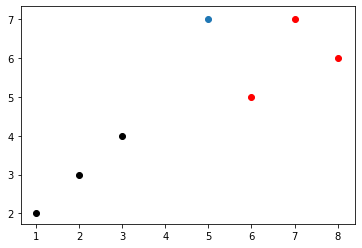

In [ ]:
for i in dc:
    for j in dc[i]:
        print(j)
        plt.scatter(j[0],j[1],color=i)
plt.scatter(new_point[0],new_point[1])

In [ ]:
def manual_knearest_neighbor(data,predict,k=3):
    distances=[]
    for i in data:
        for j in data[i]:
            euclidean_distance=np.sqrt(np.sum((np.array(j)-np.array(predict))**2))
            #print(euclidean_distance)
            distances.append((euclidean_distance,i))
    votes=[i[1] for i in sorted(distances)[:k]]
    return Counter(votes).most_common(1)[0][0]
            

In [ ]:
manual_knearest_neighbor(dc,new_point)

r


In [ ]:
#Testing Our model on the real data set

In [ ]:
df=pd.read_csv('breast-cancer-wisconsin.data')
df.replace('?',np.nan,inplace=True)
df.head()

df.dropna(inplace=True)
df.apply(pd.to_numeric)
df.info()

df.columns=['Id', 'clump_thickness','uni_cell_size','uni_cell_shape','marg_adhesion', 'single_epithelial_cell_size','bare_nuclie','bland_chromatin','norma,_nuclie','mitosis','class']
df.head()




df.dropna(inplace=True)


data=pd.to_numeric(df['bare_nuclie'])
df.drop(columns=['bare_nuclie'],inplace=True)
df.insert(6, 'bare_nuclie', data)

df.drop(columns=['Id'],inplace=True)
#Id is an irrelevant feature, it only furthers the distortion in accuracy

<class 'pandas.core.frame.DataFrame'>
Int64Index: 682 entries, 0 to 697
Data columns (total 11 columns):
1000025    682 non-null int64
5          682 non-null int64
1          682 non-null int64
1.1        682 non-null int64
1.2        682 non-null int64
2          682 non-null int64
1.3        682 non-null object
3          682 non-null int64
1.4        682 non-null int64
1.5        682 non-null int64
2.1        682 non-null int64
dtypes: int64(10), object(1)
memory usage: 63.9+ KB


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 682 entries, 0 to 697
Data columns (total 10 columns):
clump_thickness                682 non-null int64
uni_cell_size                  682 non-null int64
uni_cell_shape                 682 non-null int64
marg_adhesion                  682 non-null int64
single_epithelial_cell_size    682 non-null int64
bare_nuclie                    682 non-null int64
bland_chromatin                682 non-null int64
norma,_nuclie                  682 non-null int64
mitosis                        682 non-null int64
class                          682 non-null int64
dtypes: int64(10)
memory usage: 58.6 KB


In [ ]:
full_data = df.astype(float).values.tolist()


In [ ]:
full_data

[[5.0, 4.0, 4.0, 5.0, 7.0, 10.0, 3.0, 2.0, 1.0, 2.0],
 [3.0, 1.0, 1.0, 1.0, 2.0, 2.0, 3.0, 1.0, 1.0, 2.0],
 [6.0, 8.0, 8.0, 1.0, 3.0, 4.0, 3.0, 7.0, 1.0, 2.0],
 [4.0, 1.0, 1.0, 3.0, 2.0, 1.0, 3.0, 1.0, 1.0, 2.0],
 [8.0, 10.0, 10.0, 8.0, 7.0, 10.0, 9.0, 7.0, 1.0, 4.0],
 [1.0, 1.0, 1.0, 1.0, 2.0, 10.0, 3.0, 1.0, 1.0, 2.0],
 [2.0, 1.0, 2.0, 1.0, 2.0, 1.0, 3.0, 1.0, 1.0, 2.0],
 [2.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 5.0, 2.0],
 [4.0, 2.0, 1.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0, 2.0],
 [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 3.0, 1.0, 1.0, 2.0],
 [2.0, 1.0, 1.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0, 2.0],
 [5.0, 3.0, 3.0, 3.0, 2.0, 3.0, 4.0, 4.0, 1.0, 4.0],
 [1.0, 1.0, 1.0, 1.0, 2.0, 3.0, 3.0, 1.0, 1.0, 2.0],
 [8.0, 7.0, 5.0, 10.0, 7.0, 9.0, 5.0, 5.0, 4.0, 4.0],
 [7.0, 4.0, 6.0, 4.0, 6.0, 1.0, 4.0, 3.0, 1.0, 4.0],
 [4.0, 1.0, 1.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0, 2.0],
 [4.0, 1.0, 1.0, 1.0, 2.0, 1.0, 3.0, 1.0, 1.0, 2.0],
 [10.0, 7.0, 7.0, 6.0, 4.0, 10.0, 4.0, 1.0, 2.0, 4.0],
 [6.0, 1.0, 1.0, 1.0, 2.0, 1.0, 3.0, 1

In [ ]:
import random
random.shuffle(full_data)
test_size = 0.2
train_set = {2:[], 4:[]}
test_set = {2:[], 4:[]}


In [ ]:
train_data=full_data[:-int(test_size*len(full_data))]
test_data=full_data[-int(test_size*len(full_data)):]

In [ ]:
for i in train_data:
    train_set[i[-1]].append(i[:-1])
for i in test_data:
    test_set[i[-1]].append(i[:-1])

In [ ]:
####________________________________________
#Breaking down the code for understanding
correct = 0
total = 0
manual_knearest_neighbor(train_set,[7.0, 8.0, 7.0, 6.0, 4.0, 3.0, 8.0, 8.0, 4.0],k=5)


4

In [ ]:
for i in test_set:
    break
    for data in test_set[i]:
        if i==manual_knearest_neighbor(train_set,j,k=5):
            print('----------------')
            
            correct+=1
        total+=1

        

In [ ]:
train_set[4][0]
test_set[4][0]

[10.0, 3.0, 6.0, 2.0, 3.0, 5.0, 4.0, 10.0, 2.0]

In [ ]:
euclidean_distance=np.sqrt(np.sum((np.array([6.0, 5.0, 5.0, 8.0, 4.0, 10.0, 3.0, 4.0, 1.0])-np.array([7.0, 8.0, 7.0, 6.0, 4.0, 3.0, 8.0, 8.0, 4.0]))**2))

In [ ]:
euclidean_distance

10.816653826391969

In [ ]:
manual_knearest_neighbor(train_set,[7.0, 8.0, 7.0, 6.0, 4.0, 3.0, 8.0, 8.0, 4.0],k=5)

4

In [ ]:
data=train_set
predict=[7.0, 8.0, 7.0, 6.0, 4.0, 3.0, 8.0, 8.0, 4.0]
k=3
distances=[]
for i in data:
    for j in data[i]:
        euclidean_distance=np.sqrt(np.sum((np.array(j)-np.array(predict))**2))
        #print(euclidean_distance)
        print(euclidean_distance,i)
        distances.append((euclidean_distance,i))
        
        print('--------------------------------------------------------------------------------------')
votes=[i[1] for i in sorted(distances)[:k]]
print(distances)
print(votes)
print(Counter(votes).most_common(1)[0][0])


15.556349186104045 2
--------------------------------------------------------------------------------------
15.556349186104045 2
--------------------------------------------------------------------------------------
15.0996688705415 2
--------------------------------------------------------------------------------------
14.866068747318506 2
--------------------------------------------------------------------------------------
15.329709716755891 2
--------------------------------------------------------------------------------------
14.177446878757825 2
--------------------------------------------------------------------------------------
12.489995996796797 2
--------------------------------------------------------------------------------------
13.152946437965905 2
--------------------------------------------------------------------------------------
13.490737563232042 2
--------------------------------------------------------------------------------------
15.394804318340652 2
---------

In [ ]:
votes=[i[1] for i in sorted(distances)[:k]]
votes

[4, 4, 4]

In [ ]:
Counter(votes).most_common(1)[0][0]

4

In [ ]:
#Continuation-------------------------

In [ ]:
correct = 0
total = 0

for group in test_set:
    for data in test_set[group]:
        vote = manual_knearest_neighbor(train_set, data, k=5)
        if vote==group:
            correct+=1
        total+=1
    
accuracy=correct/total
print(accuracy)

0.9705882352941176


In [ ]:
#Some FInal comments---

# Comparing the code in K-nearest neighbors and our default coded algorithm- Accuracy comes out to be close
#But Sklearns algo is faster, because it uses threading and does not test linearly but maybe parallely
#Sklearn can also use radius to track points and save interation time

#Classification can be done using Regression:
#Further, Lineaepoints can be tested using linear regression. Find the best fir line, 
#-calculate the distance from best fit line to the point and classify

#But K-Nneighbors can do the same on non linear-data 